In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Bird Strikes data.xlsx')

In [4]:
import seaborn as sns

In [5]:
df = pd.read_excel('Bird Strikes data.xlsx',)

In [6]:
# Yearly analysis
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
df['Year'] = df['FlightDate'].dt.year

In [7]:
# Bird strikes per year
yearly_strikes = df['Year'].value_counts().sort_index()



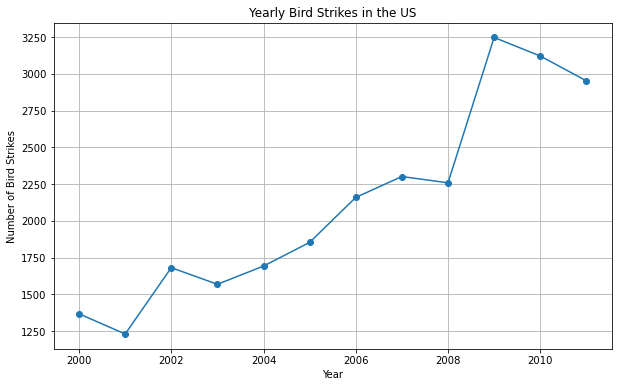

In [8]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_strikes.index, yearly_strikes.values, marker='o')
plt.title('Yearly Bird Strikes in the US')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()

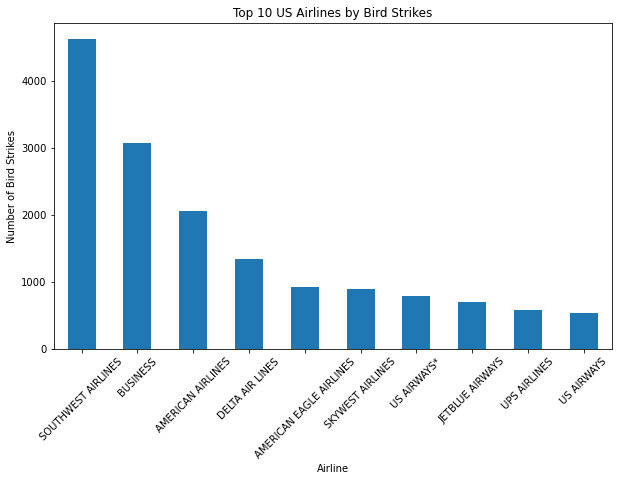

In [9]:
top_airlines = df['Aircraft: Airline/Operator'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
top_airlines.plot(kind='bar')
plt.title('Top 10 US Airlines by Bird Strikes')
plt.xlabel('Airline')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()


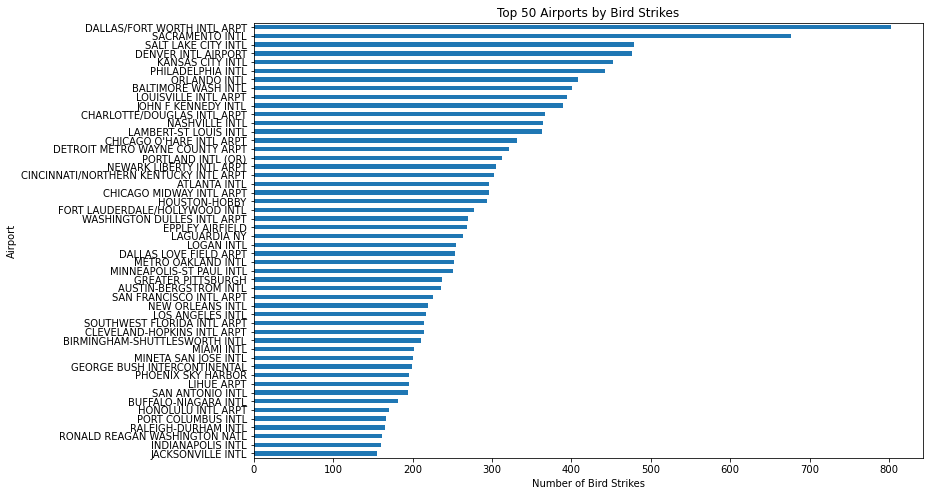

In [10]:
top_airports = df['Airport: Name'].value_counts().head(50)

# Plot
plt.figure(figsize=(12, 8))
top_airports.plot(kind='barh')
plt.title('Top 50 Airports by Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()


In [12]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
df['Year'] = df['FlightDate'].dt.year
yearly_cost = df.groupby('Year')['Cost: Total $'].sum().reset_index()
yearly_cost.columns = ['Year', 'Total Cost']
print(yearly_cost)

      Year  Total Cost
0   2000.0     5625496
1   2001.0    23252168
2   2002.0     9046405
3   2003.0    13176787
4   2004.0     8116866
5   2005.0     7026670
6   2006.0    18309903
7   2007.0    10822426
8   2008.0    11966121
9   2009.0     9564327
10  2010.0    11459879
11  2011.0    13180130


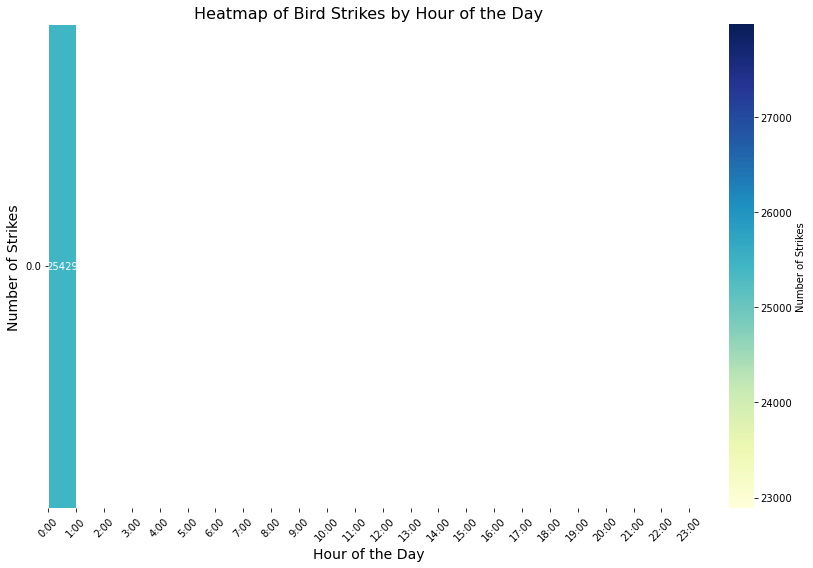

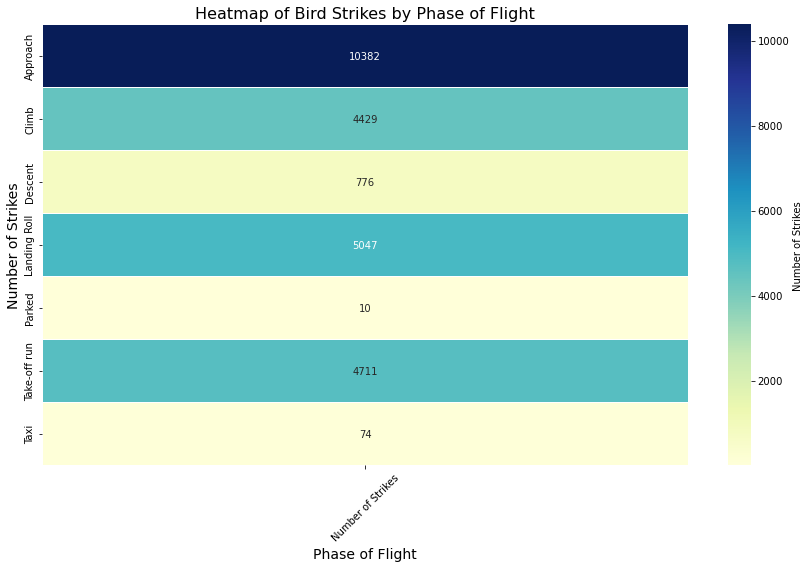

In [20]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Extract the hour of the day from 'FlightDate'
df['Hour'] = df['FlightDate'].dt.hour

# Aggregate data: Count of bird strikes by hour and phase of flight
hourly_strikes = df.groupby('Hour').size().reset_index(name='Number of Strikes')
phase_of_flight_strikes = df.groupby('When: Phase of flight').size().reset_index(name='Number of Strikes')

# Create a DataFrame for heatmap plotting
hourly_strikes_heatmap = hourly_strikes.pivot_table(index='Hour', values='Number of Strikes', fill_value=0)
phase_of_flight_heatmap = phase_of_flight_strikes.pivot_table(index='When: Phase of flight', values='Number of Strikes', fill_value=0)

# Plot heatmap for number of strikes by hour of the day
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_strikes_heatmap, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Strikes'})
plt.title('Heatmap of Bird Strikes by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Strikes', fontsize=14)
plt.xticks(ticks=range(24), labels=[f'{h}:00' for h in range(24)], rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot heatmap for number of strikes by phase of flight
plt.figure(figsize=(12, 8))
sns.heatmap(phase_of_flight_heatmap, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Strikes'})
plt.title('Heatmap of Bird Strikes by Phase of Flight', fontsize=16)
plt.xlabel('Phase of Flight', fontsize=14)
plt.ylabel('Number of Strikes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

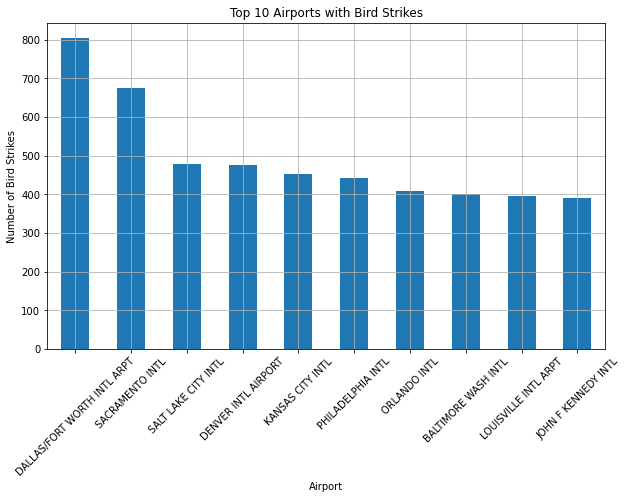

In [50]:
# Visual 3: Top 10 Airports with Bird Strikes
plt.figure(figsize=(10, 6))
top_airports = df['Airport: Name'].value_counts().head(10)
top_airports.plot(kind='bar')
plt.title('Top 10 Airports with Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

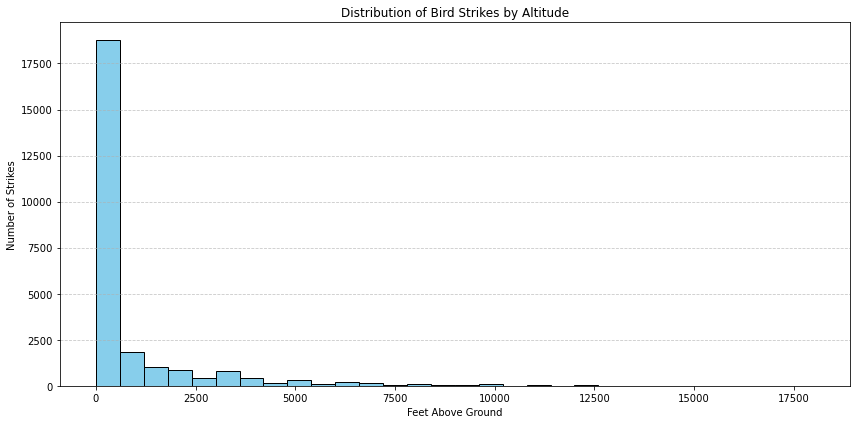

In [27]:
df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')
plt.figure(figsize=(12, 6))
plt.hist(df['Feet above ground'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Feet Above Ground')
plt.ylabel('Number of Strikes')
plt.title('Distribution of Bird Strikes by Altitude')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()  

In [29]:
# Check the column names and data
print("Columns in the dataset:", df.columns)
print("First few rows of the dataset:")
print(df.head())

# Count occurrences of each type of impact or damage
impact_counts = df['Effect: Indicated Damage'].value_counts()

# Print impact counts to verify data
print("Impact Counts:")
print(impact_counts)

# Plot bar chart if impact_counts is not empty
if not impact_counts.empty:
    plt.figure(figsize=(12, 6))
    impact_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel('Impact or Damage Type')
    plt.ylabel('Number of Occurrences')
    plt.title('Frequency of Bird Strike Impacts and Damages')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for plotting.")

Columns in the dataset: Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')
First few rows of the dataset:
   Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DA

In [58]:
# Pilots 
df['Pilot warned of birds or wildlife?'] = df['Pilot warned of birds or wildlife?'].str.upper()


In [30]:
print("Unique values in 'Pilot warned of birds or wildlife?' column:")
print(df['Pilot warned of birds or wildlife?'].unique())

Unique values in 'Pilot warned of birds or wildlife?' column:
['N' 'Y' nan]


In [31]:
pilot_warned_counts = df['Pilot warned of birds or wildlife?'].value_counts()
total_strikes = df.shape[0]

In [32]:
if 'N' in pilot_warned_counts.index:
    warned_percentage_n = (pilot_warned_counts['N'] / total_strikes) * 100

In [33]:
warned_percentage_y = 0
warned_percentage_n = 0

In [34]:
if 'Y' in pilot_warned_counts.index:
    warned_percentage_y = (pilot_warned_counts['Y'] / total_strikes) * 100

In [35]:
if 'N' in pilot_warned_counts.index:
    warned_percentage_n = (pilot_warned_counts['N'] / total_strikes) * 100


In [65]:
# Print results and counts
print(f"Percentage of Bird Strikes where Pilots Were Warned (Y): {warned_percentage_y:.2f}%")
print(f"Percentage of Bird Strikes where Pilots Were Not Warned (N): {warned_percentage_n:.2f}%")
print(f"Pilot Warned of Birds or Wildlife Counts:\n{pilot_warned_counts}")

Percentage of Bird Strikes where Pilots Were Warned (Y): 42.50%
Percentage of Bird Strikes where Pilots Were Not Warned (N): 57.00%
Pilot Warned of Birds or Wildlife Counts:
N    14567
Y    10862
Name: Pilot warned of birds or wildlife?, dtype: int64


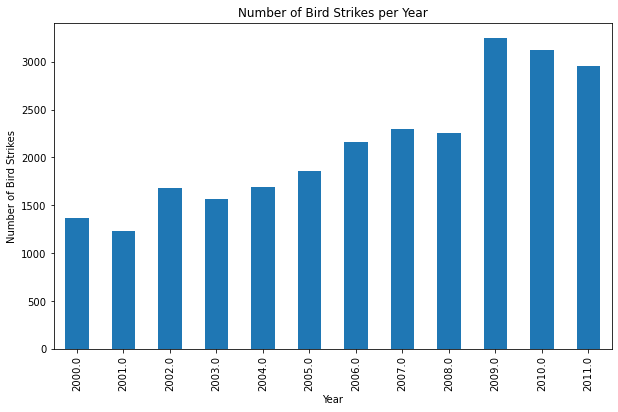

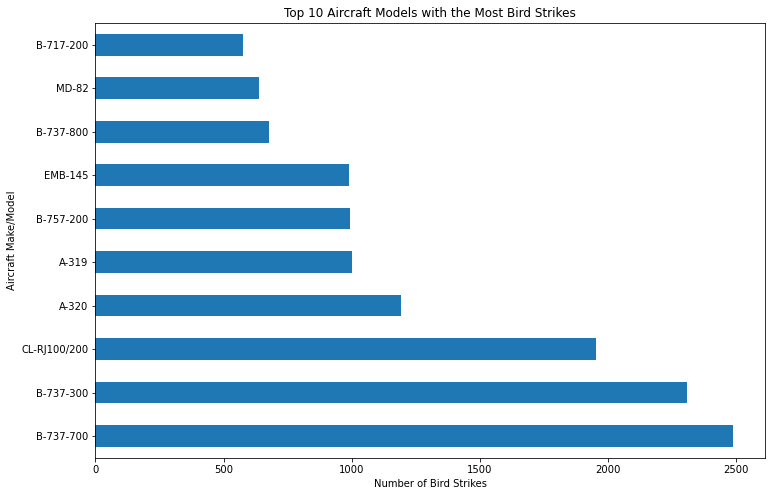

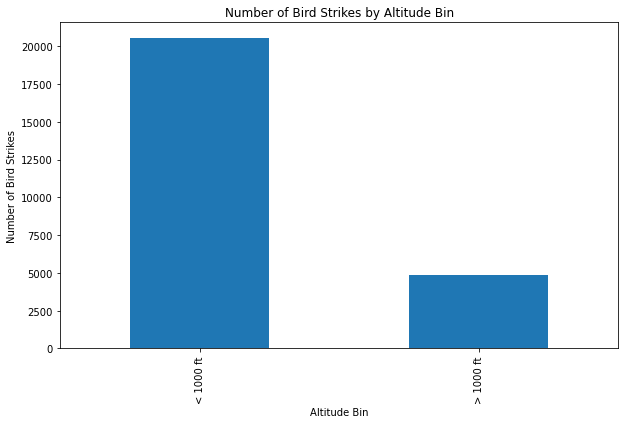

In [66]:
# Number of Bird Strikes Over Time
df['Year'] = df['FlightDate'].dt.year
bird_strikes_per_year = df.groupby('Year').size()

plt.figure(figsize=(10, 6))
bird_strikes_per_year.plot(kind='bar')
plt.title('Number of Bird Strikes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.show()

# Bird Strikes by Aircraft Make/Model
bird_strikes_per_aircraft = df.groupby('Aircraft: Make/Model').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
bird_strikes_per_aircraft.plot(kind='barh')
plt.title('Top 10 Aircraft Models with the Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Aircraft Make/Model')
plt.show()

# Bird Strikes by Altitude Bin
bird_strikes_per_altitude = df.groupby('Altitude bin').size()

plt.figure(figsize=(10, 6))
bird_strikes_per_altitude.plot(kind='bar')
plt.title('Number of Bird Strikes by Altitude Bin')
plt.xlabel('Altitude Bin')
plt.ylabel('Number of Bird Strikes')
plt.show()

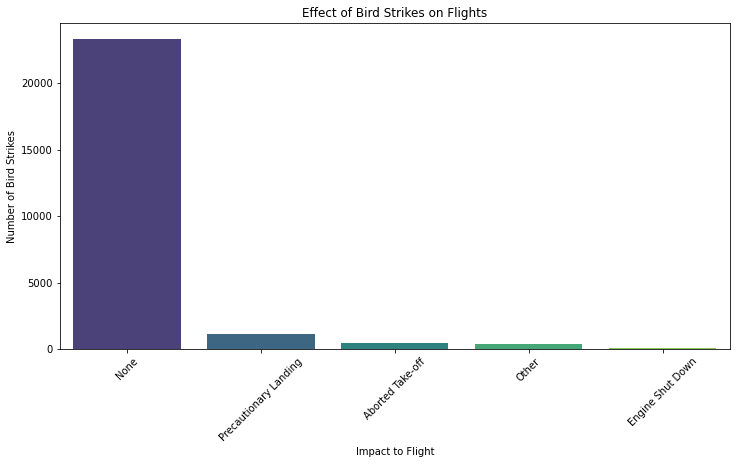

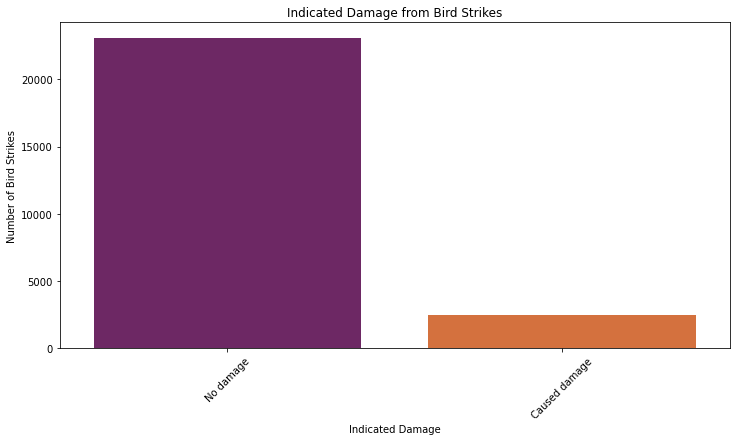

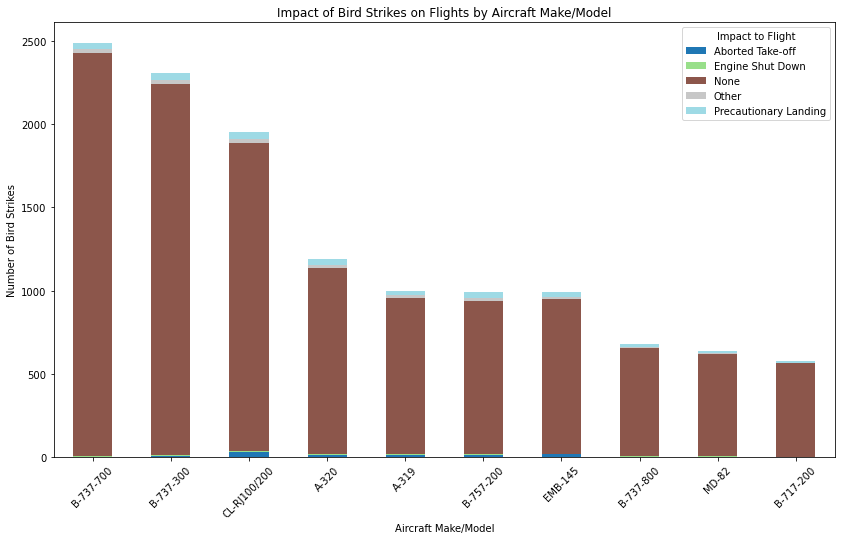

In [67]:
# Effect on Flights
impact_counts = df['Effect: Impact to flight'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=impact_counts.index, y=impact_counts.values, palette="viridis")
plt.title('Effect of Bird Strikes on Flights')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

# Indicated Damage
damage_counts = df['Effect: Indicated Damage'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=damage_counts.index, y=damage_counts.values, palette="inferno")
plt.title('Indicated Damage from Bird Strikes')
plt.xlabel('Indicated Damage')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

# Impact by Aircraft Make/Model
impact_by_aircraft = df.groupby('Aircraft: Make/Model')['Effect: Impact to flight'].value_counts().unstack().fillna(0)

top_10_aircraft = impact_by_aircraft.sum(axis=1).sort_values(ascending=False).head(10).index
impact_by_aircraft_top_10 = impact_by_aircraft.loc[top_10_aircraft]

impact_by_aircraft_top_10.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Impact of Bird Strikes on Flights by Aircraft Make/Model')
plt.xlabel('Aircraft Make/Model')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.legend(title='Impact to Flight')
plt.show()

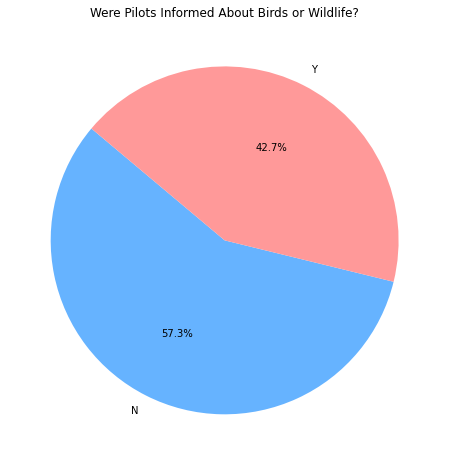

<Figure size 864x576 with 0 Axes>

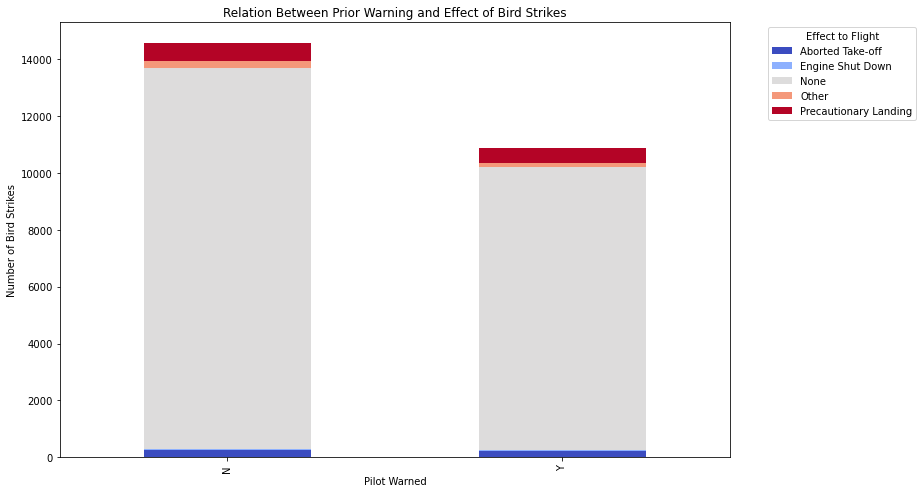

In [70]:
# Analysis: Were Pilots Informed?

pilot_informed_counts = df['Pilot warned of birds or wildlife?'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
pilot_informed_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999','#99ff99','#ffcc99'])
plt.title('Were Pilots Informed About Birds or Wildlife?')
plt.ylabel('')  # Hide the y-label
plt.show()
# Analysis: Prior Warning and Effect of Strike Relation
# Cross-tabulation of prior warning and effect of bird strikes
prior_warning_effect = pd.crosstab(df['Pilot warned of birds or wildlife?'], df['Effect: Impact to flight'])

plt.figure(figsize=(12, 8))
prior_warning_effect.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 8))
plt.title('Relation Between Prior Warning and Effect of Bird Strikes')
plt.xlabel('Pilot Warned')
plt.ylabel('Number of Bird Strikes')
plt.legend(title='Effect to Flight', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

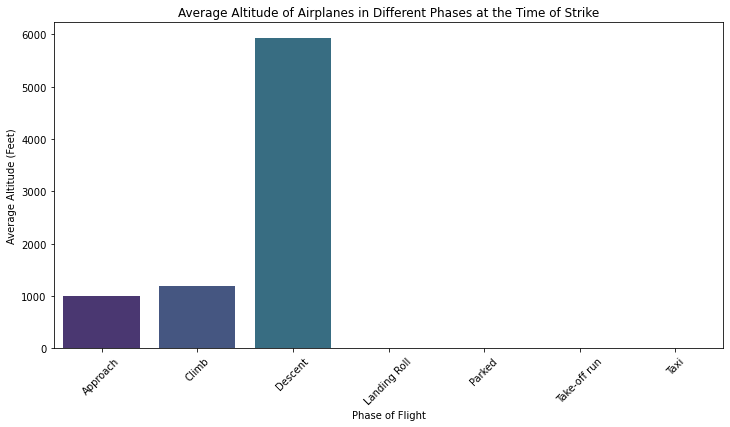

In [71]:
# Convert FlightDate to datetime
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')

# Ensure 'Feet above ground' is numeric
df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')

# Calculate the average altitude for each phase of flight
avg_altitude_by_phase = df.groupby('When: Phase of flight')['Feet above ground'].mean().dropna()

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_altitude_by_phase.index, y=avg_altitude_by_phase.values, palette='viridis')
plt.title('Average Altitude of Airplanes in Different Phases at the Time of Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude (Feet)')
plt.xticks(rotation=45)
plt.show()

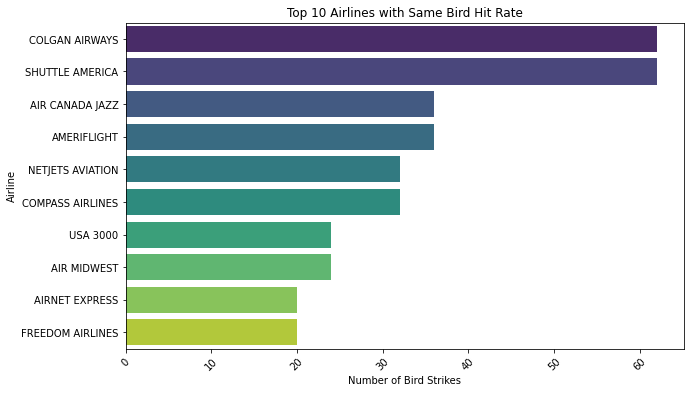

In [42]:
airline_counts = df['Aircraft: Airline/Operator'].value_counts()
hit_rate_groups = airline_counts.reset_index().groupby('Aircraft: Airline/Operator').filter(lambda x: len(x) > 1)
hit_rate_groups = hit_rate_groups.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=hit_rate_groups, x='Aircraft: Airline/Operator', y='index', palette='viridis')
plt.title('Top 10 Airlines with Same Bird Hit Rate')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airline')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Ensure 'Cost: Total $' and 'Aircraft: Airline/Operator' are correctly formatted
df['Cost: Total $'] = pd.to_numeric(df['Cost: Total $'], errors='coerce')
df['Aircraft: Airline/Operator'] = df['Aircraft: Airline/Operator'].astype(str)

# Group by airline and sum the total cost
airline_costs = df.groupby('Aircraft: Airline/Operator')['Cost: Total $'].sum()

# Sort airlines by total cost and select the top 10
top_10_airlines = airline_costs.sort_values(ascending=False).head(10)

# Print the top 10 airlines by cost
print(top_10_airlines)

Aircraft: Airline/Operator
BUSINESS             53959966
UNITED AIRLINES      11917446
DELTA AIR LINES       8316089
FEDEX EXPRESS         7545533
UPS AIRLINES          7124621
HAWAIIAN AIR          5736080
THOMSONFLY            4570000
AMERICAN AIRLINES     4541235
ALASKA AIRLINES       3367651
FRONTIER AIRLINES     3017664
Name: Cost: Total $, dtype: int64
